# I'm not sure about a title here...

# Introduction 
We have $n=[0,1,2,3,···,N-1]$ as de discrete time index for $S[n]=S_n$:

$$ \theta = e^{\frac{2\pi i}{T_o}}$$


$$\delta[0]=\delta_0 =\frac{1}{T_o}$$

$$\delta[n] =\begin{cases} \delta_0\space for \space n=0\space mod\space T_{mod} \\
                     0\space for \space n > 0 \space mod\space T_{mod} \\
       \end{cases}$$

$$r[-1]=0$$


$$r[n] = r[n-1] + \delta[n] $$



$$\hat n[n] =r[n]·\theta^{n}$$


$M$ and $T_o$ are intended to be dynamic in final versions, but for simplification to start...

We could define $M$ as, to group-3-last-symbols: 

$$M=max(S[n],S[n-1],S[n-2])+1$$

Or in a more general situation:

$$M=max(S)+1$$

Consider $S_n$ to be a discretized sample at index n

So we can define our root of unity for representing all possible values of $S$ as:

$$\zeta = e^{\frac{2\pi i}{M}}$$

We could try as base periods for the data to be for example:

$$ T_o = 3 $$

or

$$ T_o = \frac{1}{2} (1+\sqrt{5}) $$


We need a reduction factor to bound the size of the plot at the center of the complex plane
$$K=\frac{1}{\sqrt{2}T_o^2}$$


In the center of the plot we represent the values over time as: 

$$Z[n]=K·log_2(n+2)·\zeta^{S_n}$$

$$\hat \gamma [n]=\gamma^n = \zeta^{S_n}$$ 


And

$$\hat \psi [n] =\psi^n = \hat n[n]+K·\zeta^{S_n}$$


In [486]:
import re
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np 
import random
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import image
import matplotlib.animation as animation
import warnings
warnings.filterwarnings("ignore")

In [487]:
#black plots and figure size
def black_bg(sx,sy,mode):
    plt.rcParams.update({
        "lines.color": "black",
        "patch.edgecolor": "black",
        "text.color": "black",
        "axes.facecolor": "black",
        "axes.edgecolor": "black",
        "axes.labelcolor": "black",
        "xtick.color": "black",
        "ytick.color": "black",
        "grid.color": "black",
        "figure.facecolor": "black",
        "figure.edgecolor": "black",
        "savefig.facecolor": "black",
        "savefig.edgecolor": "black"})
    if mode=='2D':
        plt.figure(figsize=(sx,sy))
        plt.gca().set_aspect('equal', adjustable='box')
    if mode=='3D':
        fig = plt.figure(figsize=(sx,sy))
        ax = fig.add_subplot(111, projection='3d')
        ax.grid(False)
        ax.w_xaxis.pane.fill = False
        ax.w_yaxis.pane.fill = False
        ax.w_zaxis.pane.fill = False
        plt.style.use('dark_background')

In [488]:
#dummy primes list
primes_list_path='primes.csv'
bending_path='bending_the_index.csv'
#fibo_path='fibo.csv'
primes_list=pd.read_csv(primes_list_path)

bending_df=pd.read_csv(bending_path)
#fibo_list=pd.read_csv(fibo_path)
#ibo_list = np.array(fibo_list,dtype='int64')
#fibo_list = pd.DataFrame(fibo_list)

def isPrime(N):
    if primes_list[primes_list.eq(N).all(1)].values !=0:
        answer =   1 
    else:
        answer =   0
            
    return answer



def generate_fibo(N):
    index=np.arange(N,dtype='int64')
    fibo=np.zeros(index.size,dtype='int64')
    for n in index :
        if n==0:
            fibo[n]=0
        elif n==1:
            fibo[n]=1
        elif n>1:
            fibo[n] =fibo[n-1]+fibo[n-2] 
    
    fibo_list=pd.DataFrame(fibo)

    return fibo_list

def isFibo(N,fibo_list):
    if fibo_list[fibo_list.eq(N).any(1)].values !=0:
        answer =   1 
    else:
        answer =   0
            
    return answer


In [489]:
N=14
fibo_list=generate_fibo(N)
isFibo(35,fibo_list)

0

In [490]:

def get_eigen_atlas_2D(input_symbol,sym_src,start_index,batch_size,M,To,k_o,r_o,t_o,frac,delta_0,root_phase,root_norm,r_phase,r_norm,f_log_scat,f_psi):
#Variables preallocation
    symbol=np.zeros(batch_size,dtype=int)
    is_n_prime=np.zeros(batch_size,dtype=int)
    is_symbol_prime=np.zeros(batch_size,dtype=int)
    is_n_fibo=np.zeros(batch_size,dtype=int)
    is_symbol_fibo=np.zeros(batch_size,dtype=int)
    r_time_v   =np.zeros(batch_size,dtype=float)
    zeta_symbol     =np.zeros(batch_size,dtype=complex)
    z_log_scat =np.zeros(batch_size,dtype=complex)
    psi_v     =np.zeros(batch_size,dtype=complex)
    cplx_index =np.zeros(batch_size,dtype=complex)
    psi_v_z=np.zeros(batch_size,dtype=complex)
    z_time_norm_phase= np.zeros(batch_size,dtype=complex)
    z_carrier_information=np.zeros(batch_size,dtype=float)
    psi_v_information=np.zeros(batch_size,dtype=float)
    z_time_phase = np.zeros(batch_size,dtype=complex)
    z_time_norm  = np.zeros(batch_size,dtype=complex)
    z_time=np.zeros(batch_size,dtype=complex)
    z_carrier_alpha=np.zeros(batch_size,dtype=float)
    z_carrier_beta=np.zeros(batch_size,dtype=float)
    z_carrier=np.zeros(batch_size,dtype=complex)

    index       = np.arange(start_index,batch_size,dtype=int)  
    nmod = index%To
    smod = input_symbol%M
    wzero_time = 2 * np.pi * (1/To) 
    wzero_symbol=2 * np.pi * (1/M)

    for n in index:
        
        # Index bending
        if nmod[n]==0:
            r_time_v[n]=r_time_v[n-1]+delta_0
        else:
            r_time_v[n]=r_time_v[n-1]
        
        cplx_index[n]=r_time_v[n]*np.exp(1j * wzero_time * n )
        
        
        z_time_phase[n] = ((n+1)/r_o) * np.exp(1j * ((r_o)/r_phase) * (n+1) )
        z_time_norm[n]  = (n+1) * r_norm
        z_time_norm_phase[n]  = (n+1) * r_norm**(((r_o)/r_phase) * (n+1))
        z_time[n]=z_time_norm[n]/z_time_phase[n]
        z_carrier_alpha[n]=(r_o+t_o-(frac/r_o)*n)*z_time[n].real
        z_carrier_beta[n]=(r_o+t_o-(frac*root_norm)*n)*z_time[n].imag
        z_carrier[n]=z_carrier_alpha[n]+1j*z_carrier_beta[n]
        
        # Symbol bending
        
        if sym_src=='nmod':
            symbol[n]      = nmod[n] # symbols follow events index
        elif sym_src=='input':
            symbol[n]     = input_symbol[n] # input symbol (curated representation of discretized reality )
        elif sym_src=='rand':
            symbol[n]     = random.randint(0, M) # symbols mod M from RNG
        elif sym_src=='smod':
            symbol[n]      = smod[n] # symbols mod M


        
        zeta_symbol[n]   = np.exp(1j * wzero_symbol * symbol[n])


        #Some possible marriages between time and symbols
        psi_v[n] =cplx_index[n] + f_psi*zeta_symbol[n]
        psi_v_z[n] = z_carrier[n] + f_psi*zeta_symbol[n]
        z_log_scat[n]= f_log_scat*np.log2(n+2)*zeta_symbol[n]
        z_carrier_information=np.log2(np.abs(z_carrier[n]))


        # Index moments
        if isPrime(n)==1:
            is_n_prime[n]=1
        else:
            is_n_prime[n]=0
        
        
        
        # Symbol moments
        if isPrime(symbol[n])==1:
            is_symbol_prime[n]=1
        else:
            is_symbol_prime[n]=0
        
        


    
    df = {'index':index,'nmod':nmod,'symbol':symbol,'smod':smod,'cplx_index':cplx_index,'z_time_phase':z_time_phase,'z_time_norm':z_time_norm,'z_time':z_time,'z_carrier':z_carrier,'zeta_symbol':zeta_symbol,'psi_v':psi_v,'psi_v_z':psi_v_z,'z_log_scat':z_log_scat,'z_carrier_information':z_carrier_information,'z_time_norm_phase':z_time_norm_phase,'is_symbol_prime':is_symbol_prime,'is_n_prime':is_n_prime,'is_symbol_fibo':is_symbol_fibo,'is_n_fibo':is_n_fibo}
    df =pd.DataFrame(df)
    df = df.set_index('index')
    return df


In [491]:
# Inputs for basic eigenwheel_generator
To=39
M=39
sessions    = 20
sym_src='nmod' # 'nmod' , 'input' or 'rand'

start_index=0
batch_size  = sessions*To
  
#Initial conditions
k_o         = 1/3
r_o=1/4
t_o=To*k_o
frac=1/2 
delta_0 = 1/To

f_psi=1/10
f_log_scat = 1/10

#root impedances - initial conditions
root_phase=np.sqrt(5)
root_norm=np.sqrt(3)
r_phase=frac*(1+root_phase)
r_norm=frac*(1+1j*root_norm)

# Input symbols
                          

# Symbol follow the index
input_symbol=np.arange(start_index,batch_size,dtype=int)  


eigen_atlas=get_eigen_atlas_2D(input_symbol,sym_src,start_index,batch_size,M,To,k_o,r_o,t_o,frac,delta_0,root_phase,root_norm,r_phase,r_norm,f_log_scat,f_psi)


In [492]:
# eigen_atlas = pd.read_csv('eigen_atlas.csv')
# eigen_atlas.set_index('index',inplace=True)
#eigen_atlas.info()

In [493]:
eigen_atlas.to_csv('eigen_atlas.csv')

In [494]:
eigen_atlas

,nmod,symbol,smod,cplx_index,z_time_phase,z_time_norm,z_time,z_carrier,zeta_symbol,psi_v,psi_v_z,z_log_scat,z_carrier_information,z_time_norm_phase,is_symbol_prime,is_n_prime,is_symbol_fibo,is_n_fibo
index,,,,,,,,,,,,,,,,,,
0,0,0,0,0.025641+0.000000j,3.952349+0.615578j,0.500000+0.866025j,0.156830+0.194690j,2.077998+2.579647j,1.000000+0.000000j,0.125641+0.000000j,2.177998+2.579647j,0.100000+0.000000j,8.588498,0.986939+0.161096j,0,0,0,0
1,1,1,1,0.025309+0.004113j,7.621064+2.432979j,1.000000+1.732051j,0.184924+0.168236j,2.080390+2.083428j,0.987050+0.160411j,0.124014+0.020154j,2.179095+2.099469j,0.156444+0.025425j,8.588498,1.896192+0.635967j,0,0,0,0
2,2,2,2,0.024321+0.008120j,10.733782+5.365252j,1.500000+2.598076j,0.208611+0.137773j,1.929653+1.586862j,0.948536+0.316668j,0.119175+0.039786j,2.024507+1.618529j,0.189707+0.063334j,8.588498,2.653461+1.399694j,1,1,0,0
3,3,3,3,0.022704+0.011916j,13.040307+9.270943j,2.000000+3.464102j,0.227329+0.104028j,1.648132+1.108094j,0.885456+0.464723j,0.111250+0.058388j,1.736677+1.154566j,0.205597+0.107905j,8.588498,3.191092+2.411832j,1,1,0,0
4,4,4,4,0.020499+0.015404j,14.322769+13.959165j,2.500000+4.330127j,0.240630+0.067804j,1.263306+0.663520j,0.799443+0.600742j,0.100443+0.075478j,1.343250+0.723595j,0.206653+0.155290j,8.588498,3.451095+3.618002j,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,34,34,34,0.355243-0.369847j,2696.677802+1537.122256j,388.000000+672.035713j,0.215812+0.126194j,-331.649590-83.025817j,0.692724-0.721202j,0.424516-0.441968j,-331.580318-83.097937j,0.665138-0.692482j,8.588498,771.628709-82.250439j,0,0,0,0
776,35,35,35,0.409971-0.308073j,2431.127310+1936.306795j,388.500000+672.901739j,0.232662+0.091479j,-358.008720-60.264936j,0.799443-0.600742j,0.489915-0.368147j,-357.928776-60.325010j,0.767755-0.576930j,8.588498,775.798944+43.185628j,0,0,0,0
777,36,36,36,0.454080-0.238320j,2106.887167+2290.321040j,389.000000+673.767764j,0.243968+0.054584j,-375.894454-36.006200j,0.885456-0.464723j,0.542626-0.284792j,-375.805908-36.052673j,0.850523-0.446389j,8.588498,759.685484+167.815272j,0,0,0,0


In [495]:
# Start and end index
start=0
end=39*6

#Plot settings (flags)
allow_plot = 0
allow_scatter = 1
allow_text = 1
allow_anim_png = 0
mode ='3D' # '2D' or '3D' 

#Plot constants
base_symbol_size=20
base_text_size=13
dots_per_inch=300
L_0="*"
L_1="o"
L_2="d"
L_3="o"
L_4="d"
L_5="o"
L_6="d"
L_7="o"
d_0=0
d_1=1
d_2=2
d_3=3
d_4=4
d_5=5
d_6=6
d_7=7
jump=0
sz_1=base_symbol_size
sz_2=sz_1+jump
sz_3=sz_2+jump
sz_4=sz_3+jump
sz_5=sz_4+jump
sz_6=sz_5+jump
sz_7=sz_6+jump
sz_8=sz_7+jump
colormap_time='hsv'
colormap_symbol='hsv'
sx=20
sy=20

alpha_non_prime=0.2
# Plot colors
time_color = cm.get_cmap(colormap_time, To)
symbol_color  =cm.get_cmap(colormap_symbol, M)


symbol_size =base_symbol_size*np.ones(batch_size,dtype=int)
text_size =base_text_size*np.ones(batch_size,dtype=int)

In [496]:
def plot_eigenwheels(eigen_atlas,sx,sy,start,end,allow_scatter,allow_text,allow_anim_png,mode,symbol_size,text_size,time_color,symbol_color):
    x=eigen_atlas.z_carrier.values.real 
    y=eigen_atlas.z_carrier.values.imag
    symbol=eigen_atlas.symbol.values
    smod=eigen_atlas.smod.values
    isprime=eigen_atlas.is_n_prime.values
    ff=6
    aa=0.1
    if mode=='3D':
        z=np.log(np.abs(x+1j*y))
        fig = plt.figure(figsize=(sx,sy))
        ax = fig.add_subplot(111, projection='3d')
        ax.grid(False)
        ax.w_xaxis.pane.fill = False
        ax.w_yaxis.pane.fill = False
        ax.w_zaxis.pane.fill = False
        plt.style.use('dark_background')
    elif mode=='2D':
        black_bg(sx,sy,mode)
        
            
    
    for n in np.arange(start,end):

        
            if allow_scatter:
                
                if isprime[n]:
                    ax.scatter(x[n],y[n],z[n],color=symbol_color(symbol[n-d_0]),s=sz_1*ff*2,marker=L_0)
                    ax.scatter(x[n],-y[n],z[n],color='brown',s=sz_2*ff,marker=L_1,alpha=0.3)
                    ax.scatter(-x[n],y[n],z[n],color='aqua',s=sz_3*ff,marker=L_2,alpha=0.3)
                    ax.scatter(-x[n],-y[n],z[n],color='brown',s=sz_4*ff,marker=L_3,alpha=0.3)
                    ax.scatter(y[n],x[n],z[n],color='aqua',s=sz_5*ff,marker=L_4,alpha=0.3)
                    ax.scatter(y[n],-x[n],z[n],color='brown',s=sz_6*ff,marker=L_5,alpha=0.3)
                    ax.scatter(-y[n],x[n],z[n],color='aqua',s=sz_7*ff,marker=L_6,alpha=0.3)
                    ax.scatter(-y[n],-x[n],z[n],color='brown',s=sz_8*ff,marker=L_7,alpha=0.3)
                    # ax.scatter(x[n],-y[n],z[n],color=symbol_color(symbol[n-d_1]),s=sz_2*ff,marker=L_1,alpha=0.1)
                    # ax.scatter(-x[n],y[n],z[n],color=symbol_color(symbol[n-d_2]),s=sz_3*ff,marker=L_2,alpha=0.1)
                    # ax.scatter(-x[n],-y[n],z[n],color=symbol_color(symbol[n-d_3]),s=sz_4*ff,marker=L_3,alpha=0.1)
                    # ax.scatter(y[n],x[n],z[n],color=symbol_color(symbol[n-d_4]),s=sz_5*ff,marker=L_4,alpha=0.1)
                    # ax.scatter(y[n],-x[n],z[n],color=symbol_color(symbol[n-d_5]),s=sz_6*ff,marker=L_5,alpha=0.1)
                    # ax.scatter(-y[n],x[n],z[n],color=symbol_color(symbol[n-d_6]),s=sz_7*ff,marker=L_6,alpha=0.1)
                    # ax.scatter(-y[n],-x[n],z[n],color=symbol_color(symbol[n-d_7]),s=sz_8*ff,marker=L_7,alpha=0.1)
                    ax.text(x[n]+aa,y[n]+aa,z[n]+aa,str(n), color=symbol_color(symbol[n-0]), size=text_size[n])
                else:
                    ax.scatter(x[n],y[n],z[n],color=symbol_color(symbol[n-d_0]),s=sz_1*4,marker=L_0,alpha=0.5)
                    ax.scatter(x[n],-y[n],z[n],color='gray',s=sz_2,marker=L_1,alpha=alpha_non_prime)
                    ax.scatter(-x[n],y[n],z[n],color='gray',s=sz_3,marker=L_2,alpha=alpha_non_prime)
                    ax.scatter(-x[n],-y[n],z[n],color='gray',s=sz_4,marker=L_3,alpha=alpha_non_prime)
                    ax.scatter(y[n],x[n],z[n],color='gray',s=sz_5,marker=L_4,alpha=alpha_non_prime)
                    ax.scatter(y[n],-x[n],z[n],color='gray',s=sz_6,marker=L_5,alpha=alpha_non_prime)
                    ax.scatter(-y[n],x[n],z[n],color='gray',s=sz_7,marker=L_6,alpha=alpha_non_prime)
                    ax.scatter(-y[n],-x[n],z[n],color='gray',s=sz_8,marker=L_7,alpha=alpha_non_prime)

                    # ax.scatter(x[n],y[n],z[n],color=symbol_color(symbol[n-d_0]),s=sz_1*4,marker=L_0)
                    # ax.scatter(x[n],-y[n],z[n],color=symbol_color(symbol[13]),s=sz_2,marker=L_1,alpha=alpha_non_prime)
                    # ax.scatter(-x[n],y[n],z[n],color=symbol_color(symbol[13]),s=sz_3,marker=L_2,alpha=alpha_non_prime)
                    # ax.scatter(-x[n],-y[n],z[n],color=symbol_color(symbol[13]),s=sz_4,marker=L_3,alpha=alpha_non_prime)
                    # ax.scatter(y[n],x[n],z[n],color=symbol_color(symbol[13]),s=sz_5,marker=L_4,alpha=alpha_non_prime)
                    # ax.scatter(y[n],-x[n],z[n],color=symbol_color(symbol[13]),s=sz_6,marker=L_5,alpha=alpha_non_prime)
                    # ax.scatter(-y[n],x[n],z[n],color=symbol_color(symbol[13]),s=sz_7,marker=L_6,alpha=alpha_non_prime)
                    # ax.scatter(-y[n],-x[n],z[n],color=symbol_color(symbol[13]),s=sz_8,marker=L_7,alpha=alpha_non_prime)

                    
                 
                    
                    


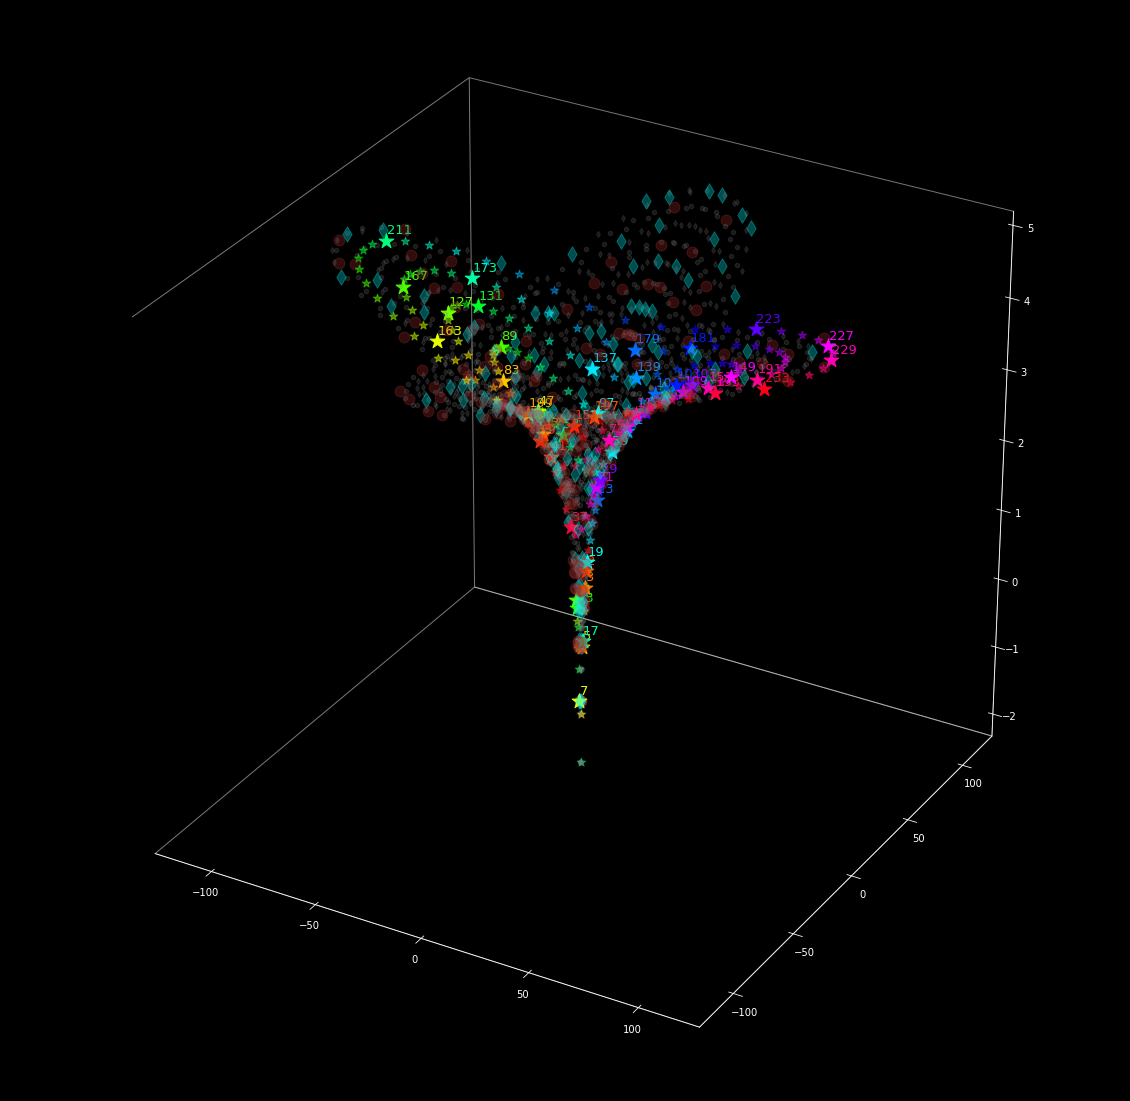

In [497]:
plot_eigenwheels(eigen_atlas,sx,sy,start,end,allow_scatter,allow_text,allow_anim_png,mode,symbol_size,text_size,time_color,symbol_color)